<a href="https://colab.research.google.com/github/Demosthene-OR/Student-AI-and-Data-Management/blob/main/05_intro_classification_en.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


<img src="https://prof.totalenergies.com/wp-content/uploads/2024/09/TotalEnergies_TPA_picto_DegradeRouge_RVB-1024x1024.png" height="150" width="150">

<hr style="border-width:2px;border-color:#75DFC1">
<center><H1> Introduction to Machine Learning with Scikit-learn </H1></center>
<center><H2> Part II: Simple Classification Models </H2></center>
<hr style="border-width:2px;border-color:#75DFC1">

> In this second part of the introduction to the `scikit-learn` module, we will focus on the second type of problem in Machine Learning: the problem of **classification**.
>
> The objective of this introduction is:
>> * To introduce the problem of classification.
>>
>>
>> * To learn how to use the `scikit-learn` module to build a classification model, also known as a “classifier.”
>>
>>
>> * To introduce useful metrics for evaluating model performance.

## Introduction to classification

### Purpose of classification

> In supervised learning, the goal is to predict the value of a target variable based on explanatory variables.
>> * In a **regression** problem, the target variable takes **continuous values**. These values are numerical: the price of a house, the amount of oxygen in the air in a city, etc. <br> The target variable can therefore take an **infinite number of values**.
>>
>>
>> * In a **classification** problem, the target variable takes **discrete values**. These values can be numerical or literal, but in both cases, the target variable takes a **finite number of values**. <br>
> The different values taken by the target variable are called **classes**.
>
> **The objective of classification is therefore to predict the class of an observation based on its explanatory variables.**

### An example of classification

> Let's take an example of **binary** classification, in other words where there are **two** classes. <br>
> We want to determine whether the water in a stream is drinkable or not based on its concentration of toxic substances and its mineral salt content.
>
> The two classes are therefore **‘drinkable’** and **‘undrinkable’**.
>
> <br>
> <img src = 'https://assets-datascientest.s3-eu-west-1.amazonaws.com/train/sklearn_intro_classification_binaire.png' style = "height:400px">
> <br>
>
> In the figure above, each point represents a stream whose position on the map is defined by its toxic substance concentration and mineral salt content values.
>
> The objective will be to build a **model capable of assigning one of the two classes** (‘drinkable’/'undrinkable') to a stream for which only these two variables are known.
>
> The figure above suggests the existence of two zones that make it easy to classify streams:
>> * A zone where streams are drinkable (top left).
>>
>>
>> * An area where streams are non-potable (bottom right).
>
> We would like to create a model capable of **separating the dataset into two parts** corresponding to these areas.
>
> A simple technique would be to separate the two areas **using a line**.

* **(a)** Run the following cell to display the interactive figure.
> * The **orange** dots are **drinkable** streams and the **blue** dots are **undrinkable** streams.
>
> * The **red arrow** corresponds to a **vector** defined by $w = (w_1, w_2)$. The red line corresponds to the plane orthogonal (i.e., perpendicular) to $w$. You can modify the coordinates of the vector $w$ in two ways:
>> * By scrolling the sliders `w_1` and `w_2`.
>>
>>
>> * By clicking on the values to the right of the sliders and then directly entering the desired value.


* **(b)** Try to find a vector $w$ such that **the plane orthogonal to $w$ perfectly separates the two classes of streams**.


* **(c)** One possible solution is given by the vector $w = (-1.47, 0.84)$. Does the vector $w = (1.47, -0.84)$ also give a solution?



In [1]:
!wget -q https://raw.githubusercontent.com/Demosthene-OR/Student-AI-and-Data-Management/main/classification_widgets.py
from classification_widgets import linear_classification

linear_classification()

Figure(axes=[Axis(label='Toxic Substance Concentration', scale=LinearScale(max=3.0, min=-3.0)), Axis(label='Mi…

interactive(children=(FloatSlider(value=1.0, description='w1', max=4.0, min=-4.0), FloatSlider(value=1.0, desc…


> The classification we have just performed is **linear**, meaning that we used a linear plane to separate our classes.
>
> Thus, the objective of linear classification models is to find the vector $w$ that best separates the different classes. <br>
> Each linear model has its own technique for finding this vector.
>
> There are also non-linear classification models, which we will look at later.
>
> <br>
> <img src = 'https://assets-datascientest.s3-eu-west-1.amazonaws.com/train/sklearn_intro_classification_lin_non_lin.png' style = “height:400px”>

## 1. Using `scikit-learn` for classification

> We will now introduce the main tools of the `scikit-learn` module that are essential for solving a classification problem.
>
> In this exercise, we will use the [Congressional Voting Records](https://archive.ics.uci.edu/ml/datasets/congressional+voting+records) dataset, which contains a number of votes cast by members of the U.S. House of Representatives.
>
> The objective of our classification problem will be to **predict the political party** (“Democrat” or “Republican”) of members of the House of Representatives based on their votes on issues such as education, health, the budget, etc.
>
> The explanatory variables will therefore be votes on different issues, and the target variable will be the political party “Democrat” or “Republican.”
>
> To solve this problem, we will use a linear classification model: **Logistic Regression**.


### Data preparation

* **(a)** Run the following cell to import the `pandas` and `numpy` modules needed for the rest of the exercise.



In [2]:
import pandas as pd
import numpy as np
%matplotlib inline


* **(b)** Load the data contained in the `‘votes.csv’` file into a `DataFrame` named `votes`.


In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/Demosthene-OR/Student-AI-and-Data-Management/main/data/votes.csv')
df.head()

,party,infants,water,budget,physician,salvador,religious,satellite,aid,missile,immigration,synfuels,education,superfund,crime,duty_free_exports,eaa_rsa
0,republican,n,y,n,y,y,y,n,n,n,y,n,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,n
2,democrat,n,y,y,n,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,n,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,n,y,y,y,y


In [4]:
url = "https://raw.githubusercontent.com/Demosthene-OR/Student-AI-and-Data-Management/main/data/"
votes = pd.read_csv(url+'votes.csv')


To briefly visualize our data:

* **(c)** Display the number of rows and columns in `votes`.


* **(d)** Display a preview of the first 20 rows of `votes`.



In [5]:
rows = len(votes)
columns = len(votes.columns)
print(f"The number of rows is: {rows} and the number of columns is: {columns}")

The number of rows is: 435 and the number of columns is: 17


In [6]:
votes.head(20)

,party,infants,water,budget,physician,salvador,religious,satellite,aid,missile,immigration,synfuels,education,superfund,crime,duty_free_exports,eaa_rsa
0,republican,n,y,n,y,y,y,n,n,n,y,n,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,n
2,democrat,n,y,y,n,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,n,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,n,y,y,y,y
5,democrat,n,y,y,n,y,y,n,n,n,n,n,n,y,y,y,y
6,democrat,n,y,n,y,y,y,n,n,n,n,n,n,n,y,y,y
7,republican,n,y,n,y,y,y,n,n,n,n,n,n,y,y,n,y
8,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,y
9,democrat,y,y,y,n,n,n,y,y,y,n,n,n,n,n,n,n



> * The first column, **“party,”** contains the name of the **political party** to which each member of the House of Representatives belongs.  
>
>
> * The following **16 columns** contain each member of Congress's votes on proposed legislation:
>> * `‘y’` indicates that the elected official voted **for** the proposed legislation.
>>
>>
>> * `‘n’` indicates that the elected official voted **against** the proposed legislation.
>
> In order to use the data in a classification model, these columns must be converted into binary **numeric** values, i.e., either 0 or 1.

* **(e)** For each of columns 1 to 16 (column 0 being our target variable), replace the values `‘y’` with 1 and `‘n’` with 0. To do this, we can use the **`replace`** method of the `DataFrame` class.


* **(f)** Display the first 10 rows of the modified `DataFrame`.



In [7]:
votes.replace({'y': 1, 'n': 0}, inplace=True)
votes.head()

/tmp/ipython-input-4105993382.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  votes.replace({'y': 1, 'n': 0}, inplace=True)


,party,infants,water,budget,physician,salvador,religious,satellite,aid,missile,immigration,synfuels,education,superfund,crime,duty_free_exports,eaa_rsa
0,republican,0,1,0,1,1,1,0,0,0,1,0,1,1,1,0,1
1,republican,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,0
2,democrat,0,1,1,0,1,1,0,0,0,0,1,0,1,1,0,0
3,democrat,0,1,1,0,0,1,0,0,0,0,1,0,1,0,0,1
4,democrat,1,1,1,0,1,1,0,0,0,0,1,0,1,1,1,1



* **(g)** In a `DataFrame` named `X`, store the **explanatory** variables of the dataset (all columns except `‘party’`). To do this, you can use the **`drop`** method of a `DataFrame`.


* **(h)** In a `Series` named `y`, store the **target variable** (`‘party’`).



In [8]:
X = votes.drop('party', axis = 1)
y = votes["party"]
X.head()

,infants,water,budget,physician,salvador,religious,satellite,aid,missile,immigration,synfuels,education,superfund,crime,duty_free_exports,eaa_rsa
0,0,1,0,1,1,1,0,0,0,1,0,1,1,1,0,1
1,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,0
2,0,1,1,0,1,1,0,0,0,0,1,0,1,1,0,0
3,0,1,1,0,0,1,0,0,0,0,1,0,1,0,0,1
4,1,1,1,0,1,1,0,0,0,0,1,0,1,1,1,1


> As with regression, we will need to split the dataset into two parts: a **training** set and a **test** set. As a reminder:
>> * The training set is used to **train the classification model**, i.e., to find the model parameters that best separate the classes.
>>
>>
>> * The test set is used to **evaluate** the model on data it has never seen before. This evaluation will allow us to judge the model's ability to **generalize**.

* **(i)** Import the `train_test_split` function from the `sklearn.model_selection` submodule. Remember that this function is used as follows:
>python
>X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
>


* **(j)** Separate the data into a training set `(X_train, y_train)` and a test set `(X_test, y_test)`, keeping 20% of the data for the test sample.
> To eliminate the randomness of the `train_test_split` function, you can use the `random_state` parameter with an integer value (e.g., `random_state = 2`). <br>
> This way, every time you use the function with the argument `random_state = 2`, the resulting datasets will be the same.


In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)


> The logistic regression model is closely related to the **linear regression** model seen in the previous notebook.
>
> They should not be **confused**, as they do not solve the same types of problems:
>> * **Logistic** regression is used for classification (predicting classes).
>>
>>
>> * **Linear** regression is used for regression (predicting a quantitative variable).
>
> The linear regression model was defined by the following formula:
> $$ y \approx \beta_0 + \sum_{j=1}^p \beta_j x_j $$
>
> Logistic regression no longer estimates $y$ directly, but rather the **probability** that $y$ is equal to 0 or 1. <br>
> Thus, the model is defined by the formula:
> $$P(y = 1) = f(\beta_0 + \sum_{j=1}^p \beta_j x_j)$$
>
> Where $$f(x) = \frac{1}{1 + e^{-x}}$$
>
> The function $f$, often called **sigmoid** or **logistic function**, transforms the linear combination $\beta_0 + \sum_{j=1}^p \beta_j x_j$ into a value between 0 and 1 that can be interpreted as a **probability**:
>> * If $\beta_0 + \sum_{j=1}^p \beta_j x_j$ is positive, then $P(y = 1) \gt 0.5$, so the predicted class of the observation will be 1.
>>
>>
>> * If $\beta_0 + \sum_{j=1}^p \beta_j x_j$ is negative, then $P(y = 1) \lt 0.5$, i.e., $P(y = 0) \gt 0.5$, so the predicted class of the observation will be 0.

* **(k)** Import the `LogisticRegression` class from the `linear_model` submodule of `scikit-learn`.


* **(l)** Instantiate a `LogisticRegression` model named **`logreg`** without specifying any constructor arguments.


* **(m)** Train the model on the training dataset using the `fit` method of the `LogisticRegression` class.


* **(n)** Make a prediction on the **test** data. Store these predictions in **`y_pred_test_logreg`** and display the first 10 predictions.



In [10]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_test_logreg = logreg.predict(X_test)
y_pred_test_logreg[:10]

array(['democrat', 'republican', 'democrat', 'democrat', 'democrat',
       'democrat', 'democrat', 'democrat', 'republican', 'democrat'],
      dtype=object)


## 2. Evaluating the performance of a classification model

> There are various metrics for evaluating the performance of classification models, such as:
>> * **Accuracy**.
>>
>>
>> * **Precision and recall**.
>
>
> Each metric evaluates the performance of the model using a different approach.
>
> In order to explain these concepts, we will introduce four very important terms.
>
> **Arbitrarily**, we will choose the class **‘republican’ as the positive class** (1) and **‘democrat’ as the negative class** (0).
>
> Thus, we will call:
>> * **True positive (TP)** an observation classified as **positive** (‘Republican’) by the model and which is actually **positive** (‘Republican’).
>>
>>
>> * **False positive (FP)**: an observation classified as **positive** (‘Republican’) by the model but which was actually **negative** (‘Democrat’).
>>
>>
>> * **True negative (TN)**: an observation classified as **negative** (‘democrat’) by the model and which is actually **negative** (‘democrat’).
>>
>>
>> * **False negative (FN)**: an observation classified as **negative** (‘Democrat’) by the model but which was actually **positive** (‘Republican’).
>
> <br>
> <img src = "https://assets-datascientest.s3-eu-west-1.amazonaws.com/train/sklearn_intro_positif_negatif.png" style = "height:300px'">
> <br>
>
> **Accuracy** is the most commonly used metric for evaluating a model. <br>
> It simply corresponds to the rate of **correct** predictions made by the model.
>
> We assume that we have $n$ observations. <br>
> We denote the number of True Positives by $\mathrm{TP}$ and the number of True Negatives by $\mathrm{TN}$. <br>
> Accuracy is then given by:
> $$\mathrm{accuracy} = \frac{\mathrm{TP} + \mathrm{TN}}{n}$$
>
> **Precision** is a metric that answers the question: **Of all the model's positive predictions, how many are true positives?**
>
> If we denote the number of False Positives in the model by $\mathrm{FP}$, then precision is given by:
> $$\mathrm{precision} = \frac{\mathrm{VP}}{\mathrm{VP} + \mathrm{FP}}$$
>
> A high precision score tells us that the model does not blindly classify all observations as positive.
>
> **Recall** is a metric that quantifies the proportion of truly positive observations that have been correctly classified as positive by the model.
>
> If we denote $\mathrm{FN}$ as the number of false negatives, then recall is given by:
> $$\mathrm{recall} = \frac{\mathrm{TP}}{\mathrm{TP} + \mathrm{FN}}$$
>
> A high recall score tells us that the model is able to detect truly positive observations well.
>
> The **confusion matrix** counts the values of TP, TN, FP, and FN for a dataset, which allows us to calculate the three previous metrics:
>
> $$
\mathrm{Confusion Matrix} = \begin{bmatrix}
                                    \mathrm{VN} & \mathrm{FP} \\
                                    \mathrm{FN} & \mathrm{VP}
                                \end{bmatrix}
 $$
>
> The **`confusion_matrix`** function in the `sklearn.metrics` submodule can be used to generate the confusion matrix from a model's **predictions**:
>
> ```python
> confusion_matrix(y_true, y_pred)
>
> ```
>
>> * **`y_true`** contains the **true** values of y.
>>
>>
>> * **`y_pred`** contains the values **predicted** by the model.
>
> The confusion matrix can also be displayed using the **`pd.crosstab`** function:

* **(a)** Import the **`accuracy_score`**, **`precision_score`**, and **`recall_score`** functions from the `sklearn.metrics` submodule.


* **(b)** Display the confusion matrix of the predictions of the **`logreg`** model using **`pd.crosstab`**.


* **(c)** Calculate the accuracy, precision, and recall of the predictions of the **`logreg`** model. To use the `precision_score` and `recall_score` metrics, you will need to specify the argument **`pos_label = ‘republican’`** to indicate that the `‘republican’` class is the positive class.


Accuracy score: 0.9310344827586207
Precision score: 0.8888888888888888
Recall score: 0.9411764705882353


<Axes: >

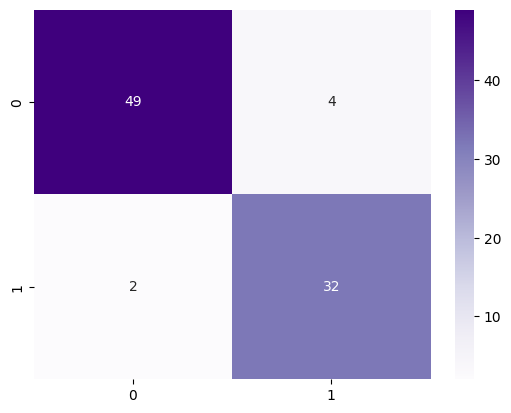

In [13]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
cm = confusion_matrix(y_test, y_pred_test_logreg)
print(f"Accuracy score: {accuracy_score(y_test, y_pred_test_logreg)}")
print(f"Precision score: {precision_score(y_test, y_pred_test_logreg, pos_label = 'republican')}")
print(f"Recall score: {recall_score(y_test, y_pred_test_logreg, pos_label = 'republican')}")

import seaborn as sns
sns.heatmap(cm, annot=True, fmt='d', cmap="Purples")


# Recap

> Scikit-learn offers numerous classification models such as **`LogisticRegression`**.
>
> These models are used in the same way as **all** scikit-learn models:
>> * **Instantiation** of the model.
>>
>>
>> * **Train** the model: **`model.fit(X_train, y_train)`**.
>>
>>
>> * **Predict**: **`model.predict(X_test)`**.
>
> Prediction on the test set allows us to **evaluate** the model's performance using appropriate **metrics**.
>
> The metrics we have seen are used for **binary** classification and are calculated using four values:
>> * True Positives:  Prediction = **+** | Reality = **+**
>>
>>
>> * True Negatives: Prediction = **-** | Reality = **-**
>>
>>
>> * False Positives:  Prediction = **+** | Reality = **-**
>>
>>
>> * False Negatives:  Prediction = **-** | Reality = **+**
>
> All these values can be calculated using the **confusion matrix** generated by the **`confusion_matrix`** function of the `sklearn.metrics` submodule or by the **`pd.crosstab`** function.
>
> Using these values, we can calculate metrics such as:
>> * **Accuracy**: The proportion of correctly classified observations.
>>
>>
>> * **Precision**: The proportion of true positives among all positive predictions made by the model.
>>
>>
>> * **Recall**: The proportion of truly positive observations that were correctly classified as positive by the model.
>
> All these metrics can be obtained using the **`classification_report`** function from the **`sklearn.metrics`** submodule.
>
# Conclusion and resources

> This module has introduced the Python programming language and its main libraries, which are very useful in the suite (Numpy, Pandas, scikit-learn). The Pandas library allows you to obtain data in the form of easily manipulable dataframes.
>
> **If you want to learn more advanced methods that build on this module, you can move on to the “105 Data Quality” module.**
>
> **If you want to apply the methods presented to other dataframes, you can do so with the “Sandbox” module. This module consists of a blank notebook in which data is available and on which you can code freely.**